In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt
import sys; sys.path.insert(0, '../')
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import mne
from esinet import Simulation
from esinet.forward import get_info, create_forward_model
from esinet.util import unpack_fwd
pp = dict(surface='white', hemi='both', verbose=0)

In [2]:
info = get_info(kind='biosemi32')
fwd = create_forward_model(info=info, sampling='ico3')

leadfield, pos = unpack_fwd(fwd)[1:3]
n_chans, n_dipoles = leadfield.shape

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    3.0s remaining:    3.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished


# Test Procedure

## Prepare Solver

In [254]:
from invert import Solver

solver = Solver("eLORETA", regularisation_method="GCV")
solver.make_inverse_operator(fwd, alpha="auto")

In [257]:
settings = dict(
    number_of_sources=1,
    extents=(25, 26),
    duration_of_trial=0.02,
    amplitudes=(1, 2),
    target_snr=1e99)

target_snrs = [1e2, 1e1, 1e0]
# target_snrs = target_snrs[::-1]
for target_snr in target_snrs:
    settings["target_snr"] = target_snr
    sim = Simulation(fwd, info, settings).simulate(2)
    stc = sim.source_data[0]
    evoked = sim.eeg_data[0].average()

    # solver.make_inverse_operator(fwd, evoked, alpha="auto")
    stc_ = solver.apply_inverse_operator(evoked)


-- number of adjacent vertices : 1284
Simulating data based on sparse patches.


100%|██████████| 2/2 [00:00<00:00, 2005.40it/s]


source data shape:  (1284, 20) (1284, 20)


100%|██████████| 2/2 [00:00<00:00, 668.73it/s]
c:\Users\Lukas\Documents\projects\invert\dev\..\invert\solvers\base.py:117: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  evoked.set_eeg_reference("average", projection=True, verbose=0).apply_proj(verbose=0)


alpha:  15.51542556592261
-- number of adjacent vertices : 1284
Simulating data based on sparse patches.


100%|██████████| 2/2 [00:00<00:00, 2005.88it/s]


source data shape:  (1284, 20) (1284, 20)


100%|██████████| 2/2 [00:00<00:00, 501.32it/s]

alpha:  94.05294262175279
-- number of adjacent vertices : 1284



c:\Users\Lukas\Documents\projects\invert\dev\..\invert\solvers\base.py:117: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  evoked.set_eeg_reference("average", projection=True, verbose=0).apply_proj(verbose=0)


Simulating data based on sparse patches.


100%|██████████| 2/2 [00:00<00:00, 2004.93it/s]


source data shape:  (1284, 20) (1284, 20)


100%|██████████| 2/2 [00:00<00:00, 501.32it/s]

alpha:  6301.723508225718



c:\Users\Lukas\Documents\projects\invert\dev\..\invert\solvers\base.py:117: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  evoked.set_eeg_reference("average", projection=True, verbose=0).apply_proj(verbose=0)


Using control points [1.70197599e-11 1.81030425e-11 2.53178022e-11]


Projections have already been applied. Setting proj attribute to True.
Projections have already been applied. Setting proj attribute to True.


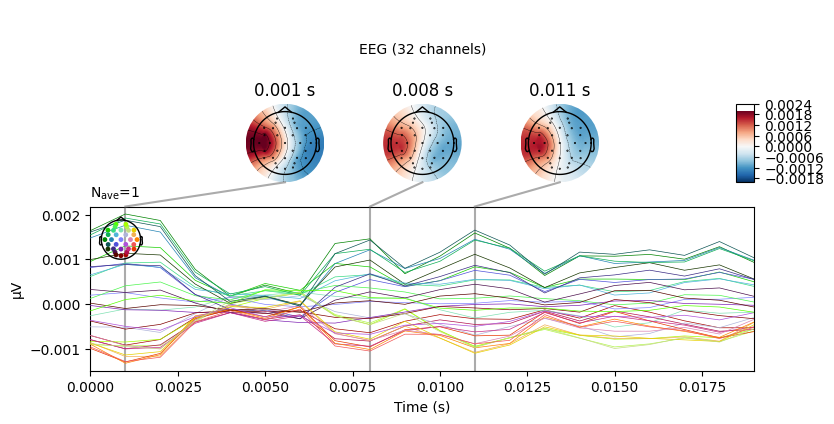

In [256]:
# stc.data /= abs(stc.data).max()
brain = stc.plot(**pp)
brain.add_text(0.1, 0.9, 'Ground Truth', 'title',
               font_size=14)
evoked.plot_joint()

# stc_.data /= abs(stc_.data).max()
brain = stc_.plot(**pp)
brain.add_text(0.1, 0.9, 'Est', 'title',
               font_size=14)
evoked_ = mne.EvokedArray(leadfield @ stc_.data, evoked.info)
evoked_.plot_joint()

# New Reg Param Optimizer

In [3]:
settings = dict(
    number_of_sources=4,
    extents=(1, 25),
    duration_of_trial=0.02,
    amplitudes=(1, 100),
    target_snr=3)

sim = Simulation(fwd, info, settings).simulate(2)

stc = sim.source_data[0]
evoked = sim.eeg_data[0].average()

stc.plot(**pp, brain_kwargs=dict(title="Ground Truth"))

evoked.plot_joint(title="Ground Truth")

-- number of adjacent vertices : 1284
Simulating data based on sparse patches.


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\Lukas\Envs\invertenv\lib\site-packages\esinet\simulation.py:387: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.simulation_info = self.simulation_info.append(d, ignore_index=True)
 50%|█████     | 1/2 [00:00<00:00,  1.92it/s]c:\Users\Lukas\Envs\invertenv\lib\site-packages\esinet\simulation.py:387: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.simulation_info = self.simulation_info.append(d, ignore_index=True)
100%|██████████| 2/2 [00:00<00:00, 1002.34it/s]


source data shape:  (1284, 20) (1284, 20)


100%|██████████| 2/2 [00:00<00:00, 1002.82it/s]


In [125]:
from scipy.stats import pearsonr
from copy import deepcopy
from invert import Solver

alpha = 0.
r_values = deepcopy(solver.r_values)

solver = Solver("gamma-map")
x_true = stc.data
y_true = evoked.data
y_true -= y_true.mean(axis=0)

n_times = y_true.shape[1]
leadfield -= leadfield.mean(axis=0)
leadfield /= np.linalg.norm(leadfield, axis=0)

x_hat_norms = []
y_hat_norms = []
residuals = []
corr_fidelity = []
sparsity = []
for r_value in r_values:
    solver.make_inverse_operator(fwd, evoked, alpha=r_value)
    
    stc_ = solver.apply_inverse_operator(evoked)

    # stc_.data /= abs(stc_.data).max()
    # brain = stc_.plot(**pp)
    # brain.add_text(0.1, 0.9, solver.name, 'title',
    #             font_size=14)

    # evoked_ = mne.EvokedArray(fwd["sol"]["data"] @ stc_.data, info)
    # evoked_.plot_joint()

    x_hat = stc_.data
    y_hat = leadfield @ stc_.data
    y_hat -= y_hat.mean(axis=0)

    x_hat_norms.append( np.linalg.norm(x_hat) )
    y_hat_norms.append( np.linalg.norm(y_hat) )

    residuals.append( np.linalg.norm(y_hat - y_true) )

    cf = np.mean([pearsonr(y_hat[:, ii], y_true[:, ii])[0]**2 for ii in range(n_times)])
    corr_fidelity.append( cf )

    spar = np.linalg.norm(x_hat, ord=1) / np.linalg.norm(x_hat, ord=2)
    # spar = np.linalg.norm(x_hat / np.linalg.norm(x_hat), ord=1)
    sparsity.append( spar )

    
y_hat_norms = np.array(y_hat_norms)
x_hat_norms = np.array(x_hat_norms)
residuals = np.array(residuals)
corr_fidelity = np.array(corr_fidelity)
sparsity = np.array(sparsity)
r_values = np.array(r_values)

In [126]:
plt.figure()
plt.plot(residuals, x_hat_norms, '*k')
plt.xlabel("residuals")
plt.ylabel("x_hat_norms")
plt.title("Old Approach")

Text(0.5, 1.0, 'Old Approach')

In [131]:
import matplotlib.pyplot as plt
from invert.util import find_corner

def minmax(X):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X_std


# plt.figure()
# plt.plot(residuals, x_hat_norms, '*k')
# plt.xlabel("residuals")
# plt.ylabel("x_hat_norms")
# plt.title("Old Approach")

# keep_idc = np.append([True,], np.diff(corr_fidelity)<0) 

# keep_idc = np.logical_and(np.append([True,], np.diff(corr_fidelity)<0),  np.append([True,], np.diff(sparsity)<0))
# keep_idc = np.array([True,]*len(r_values))
# keep_idc = ~np.isnan(sparsity)

trade_off = sparsity[keep_idc]  * corr_fidelity[keep_idc] 
# trade_off = (sparsity[keep_idc] / np.linalg.norm(sparsity[keep_idc])) * (corr_fidelity[keep_idc] / np.linalg.norm(corr_fidelity[keep_idc]))
# trade_off = z_trans(sparsity[keep_idc]) * z_trans(corr_fidelity[keep_idc])
# trade_off = minmax(sparsity[keep_idc]) * minmax(corr_fidelity[keep_idc])

# best_idx = find_corner(r_values[keep_idc], trade_off) + np.where(keep_idc)[0][0]
best_idx = np.argmax(trade_off)

plt.figure()
plt.plot(r_values[keep_idc], trade_off, '*k')
best_r = r_values[best_idx]
plt.plot(r_values[best_idx], trade_off[best_idx], 'or')
plt.xlabel("R-Values")
plt.ylabel("Trade-Off (sparsity/corr_fidelity)")

plt.title("Fidelity-Sparsity Trade-Off")

plt.figure()
plt.plot(r_values[keep_idc], corr_fidelity[keep_idc], '*k')
plt.plot(r_values[best_idx], corr_fidelity[best_idx], 'or')
plt.xlabel("r_values")
plt.ylabel("corr_fidelity")
plt.title("Correlation Fidelity")

plt.figure()
plt.plot(r_values[keep_idc], sparsity[keep_idc], '*k')
plt.plot(r_values[best_idx], sparsity[best_idx], 'or')
plt.xlabel("r_values")
plt.ylabel("sparsity")
plt.title("Sparsity")


Text(0.5, 1.0, 'Sparsity')

No projector specified for this dataset. Please consider the method self.add_proj.


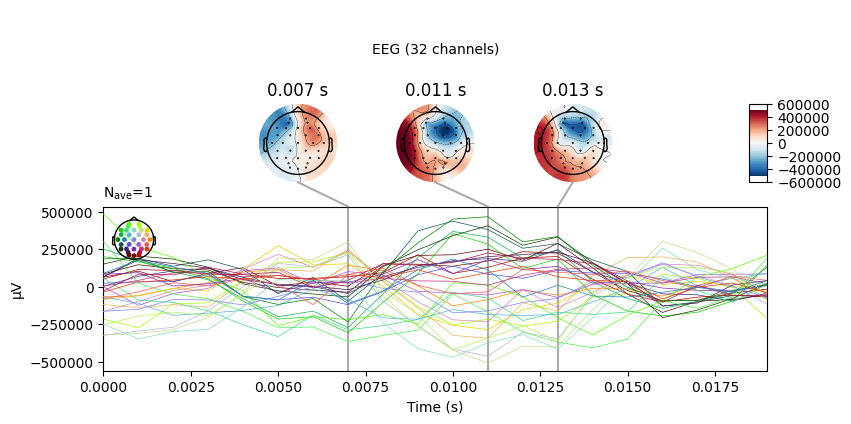

Using control points [4.10287975e-04 3.08271527e-02 5.18389479e-01]


In [124]:
solver.make_inverse_operator(fwd, evoked, alpha=r_values[best_idx])
    
stc_ = solver.apply_inverse_operator(evoked)
stc_.data /= abs(stc_.data).max()
brain = stc_.plot(**pp)
brain.add_text(0.1, 0.9, solver.name, 'title',
            font_size=14)
evoked_ = mne.EvokedArray(fwd["sol"]["data"] @ stc_.data, info)
evoked_.plot_joint()

In [110]:
solver.make_inverse_operator(fwd, evoked, alpha=r_values[best_idx])
    
stc_ = solver.apply_inverse_operator(evoked)

c:\Users\Lukas\Envs\invertenv\lib\site-packages\scipy\sparse\_dia.py:338: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


In [116]:
r_values

array([0.00000000e+00, 1.00000000e-03, 1.82334800e-03, 3.32459793e-03,
       6.06189899e-03, 1.10529514e-02, 2.01533769e-02, 3.67466194e-02,
       6.70018750e-02, 1.22167735e-01, 2.22754295e-01, 4.06158599e-01,
       7.40568469e-01, 1.35031404e+00, 2.46209240e+00, 4.48925126e+00,
       8.18546731e+00, 1.49249555e+01, 2.72133877e+01, 4.96194760e+01,
       9.04735724e+01, 1.64964807e+02, 3.00788252e+02, 5.48441658e+02,
       1.00000000e+03])